In [1]:
import numpy as np
import pandas as pd
import json
from sklearn.metrics import cohen_kappa_score

In [2]:
df1 = pd.read_csv('NLP-annotations/NLP-annotations-Arjun.csv')
df2 = pd.read_csv('NLP-annotations/NLP-annotations-Venkat.csv')

In [3]:
df1.head(3)

,annotation_id,annotator,created_at,id,lead_time,pos,text,updated_at
0,71,1,2025-01-24T14:11:32.689006Z,41,153.808,"[{""start"":0,""end"":9,""text"":""राजस्थान "",""labels...",राजस्थान के CM बनने के सवाल पर क्या बोले केंद्...,2025-01-24T14:11:32.689006Z
1,72,1,2025-01-24T14:14:20.335259Z,42,161.749,"[{""start"":0,""end"":6,""text"":""World "",""labels"":[...",World Cup Final 2023: क्या रोहित-विराट अब वर्ल...,2025-01-24T14:14:20.335259Z
2,73,1,2025-01-24T14:15:39.424390Z,43,77.107,"[{""start"":11,""end"":17,""text"":""Tunnel"",""labels""...",Uttarkashi Tunnel Rescue: उत्तरकाशी टनल में फं...,2025-01-24T14:15:39.424390Z


In [4]:
df2.head(3)

,annotation_id,annotator,created_at,id,label,lead_time,text,updated_at
0,22,1,2025-01-24T10:49:13.766051Z,14538,"[{""start"":0,""end"":8,""text"":""राजस्थान"",""labels""...",395.756,राजस्थान के CM बनने के सवाल पर क्या बोले केंद्...,2025-01-24T10:49:13.766051Z
1,23,1,2025-01-24T10:55:00.198146Z,14539,"[{""start"":0,""end"":5,""text"":""World"",""labels"":[""...",301.777,World Cup Final 2023: क्या रोहित-विराट अब वर्ल...,2025-01-24T10:55:00.198146Z
2,24,1,2025-01-24T10:57:42.074330Z,14540,"[{""start"":0,""end"":11,""text"":""Uttarkashi "",""lab...",150.674,Uttarkashi Tunnel Rescue: उत्तरकाशी टनल में फं...,2025-01-24T10:57:42.074330Z


In [5]:
df2.rename(columns={'label': 'pos'}, inplace=True)

In [6]:
df1_pos = df1[['annotation_id', 'pos', 'text']]
df2_pos = df2[['annotation_id', 'pos', 'text']]

In [7]:
df1_pos.head(3)

,annotation_id,pos,text
0,71,"[{""start"":0,""end"":9,""text"":""राजस्थान "",""labels...",राजस्थान के CM बनने के सवाल पर क्या बोले केंद्...
1,72,"[{""start"":0,""end"":6,""text"":""World "",""labels"":[...",World Cup Final 2023: क्या रोहित-विराट अब वर्ल...
2,73,"[{""start"":11,""end"":17,""text"":""Tunnel"",""labels""...",Uttarkashi Tunnel Rescue: उत्तरकाशी टनल में फं...


In [8]:
df2_pos.head(3)

,annotation_id,pos,text
0,22,"[{""start"":0,""end"":8,""text"":""राजस्थान"",""labels""...",राजस्थान के CM बनने के सवाल पर क्या बोले केंद्...
1,23,"[{""start"":0,""end"":5,""text"":""World"",""labels"":[""...",World Cup Final 2023: क्या रोहित-विराट अब वर्ल...
2,24,"[{""start"":0,""end"":11,""text"":""Uttarkashi "",""lab...",Uttarkashi Tunnel Rescue: उत्तरकाशी टनल में फं...


In [14]:
kappa_arj = []
kappa_ven = []

for row in range(0, 20):

    dict_arj = {}
    dict_ven = {}
    
    text = df2_pos['text'][row]
    text_arr = text.split()

    data_str_1 = df1_pos['pos'][row]
    data_list_1 = json.loads(data_str_1)

    for item in data_list_1:
        dict_arj[item['text']] = item['labels'][0]

    data_str_2 = df2_pos['pos'][row]
    data_list_2 = json.loads(data_str_2)

    for item in data_list_2:
        dict_ven[item['text']] = item['labels'][0]

    dict_arj = {key.strip(): value for key, value in dict_arj.items()}
    dict_ven = {key.strip(): value for key, value in dict_ven.items()}


    for i in text_arr:
        kappa_arj.append(dict_arj.get(i, 'X'))  
        kappa_ven.append(dict_ven.get(i, 'X'))  

In [20]:
kappa = cohen_kappa_score(kappa_ven, kappa_arj)
print(f"Cohens Kappa: {kappa:.4f}")

Cohens Kappa: 0.8011


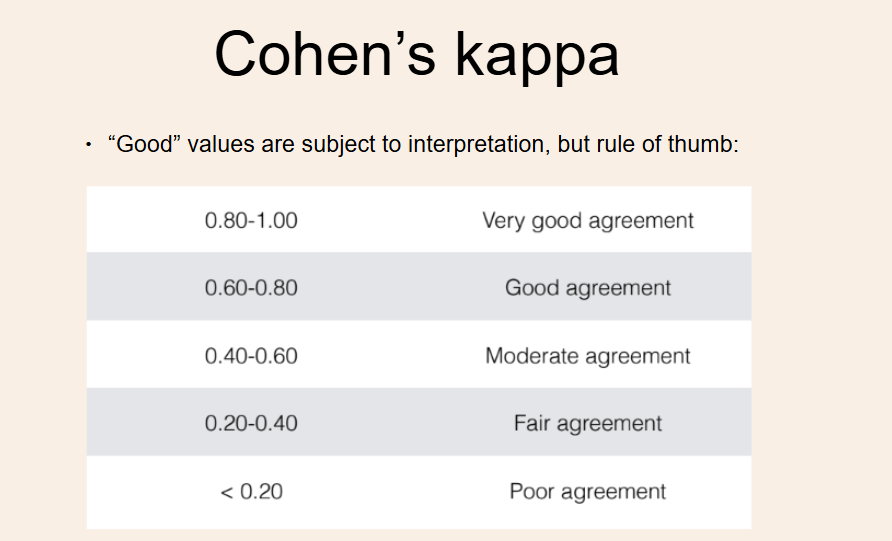
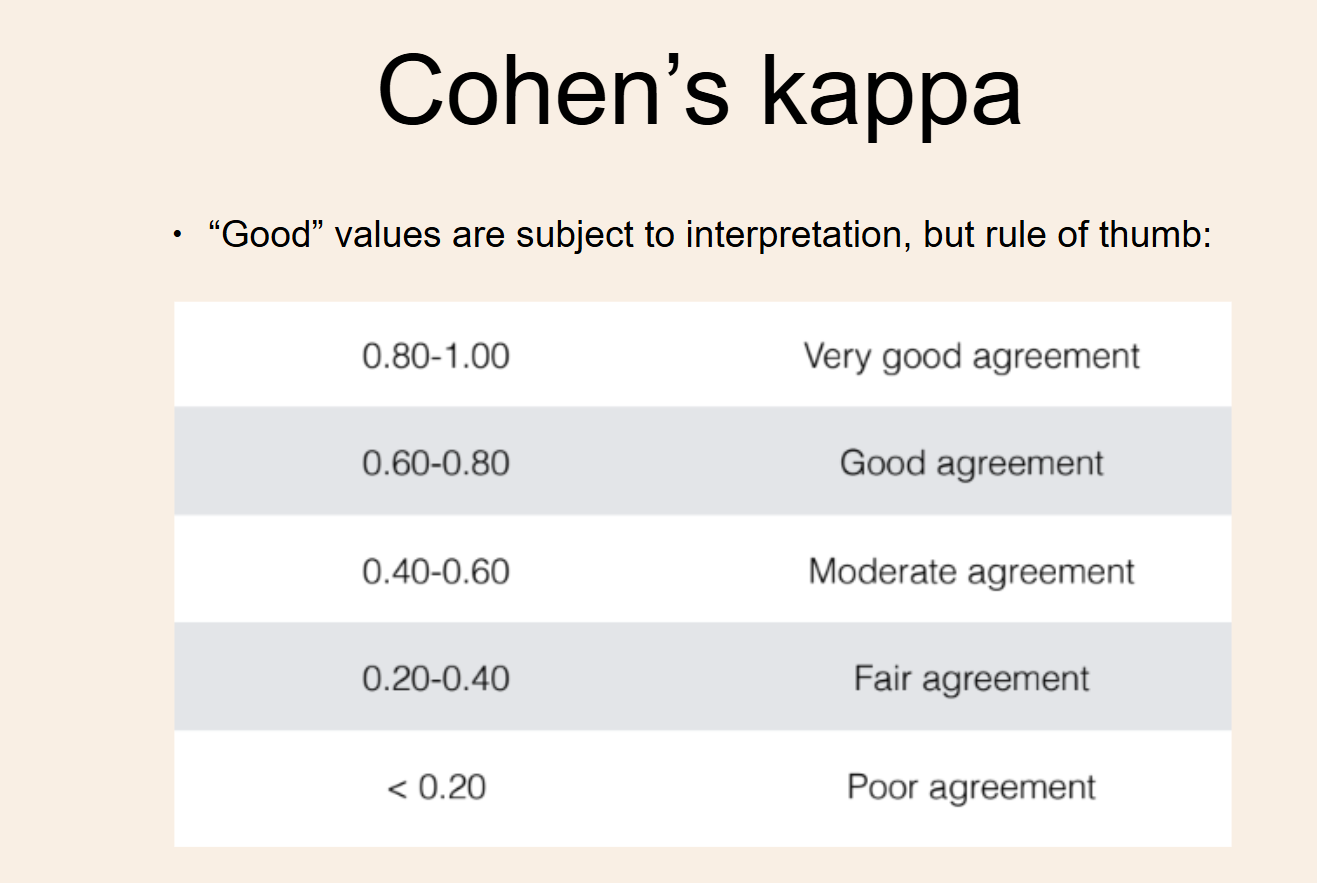

We obtained a Cohen's Kappa score of 0.8011, which falls within the range of very good agreement (0.80 - 1.00). This indicates a high level of inter-annotator agreement between Arjun and Venkat, suggesting that their annotations are highly consistent and reliable.